In [1]:
#associate summaries w/ row in podcast_df
#load in podcast_df
import pickle
import pandas as pd


#load in itunes_request_db
floc = '/home/bmassi/Dropbox/professional/Insight/data/'
with open(floc+'raw_itunes_requests1528609065.pkl','rb') as fid:
    raw_itunes_requests = pickle.load(fid)
#turn everything into a pandas dataframe
formatted_results = []
bads = []
cnames = ['']
for rir in raw_itunes_requests:
    for p in rir.json()['results']:
        if(p['kind']=='podcast'):
            formatted_results.append(p)

podcast_df = pd.DataFrame(formatted_results)
raw_itunes_requests = []

(413437, 34)

In [ ]:
#load in rss feed and parse feed
import pickle
import feedparser as fp
import time

flead = 'rss_dataraw_rss_and_bads_file'
#rss_dataraw_rss_and_bads_file6_1528772780.pkl
post = '_1528772780'
ext = '.pkl'

floc = '/home/bmassi/Dropbox/professional/Insight/data/'

#load in itunes_request_db


nfile = 56;
summaries = []
bad_summaries = []
for i in range(0,nfile):
    start_time = time.time()
    fname = flead+str(i)+post+ext
    with open(floc+fname,'rb') as fid:
        feed_data = pickle.load(fid)
    for feedlist1 in feed_data[0]:
        for feedlist2 in feedlist1:
            try:
                #second entry is ep title. This has to be podcast title, so get from feedurl
                summaries.append((feedlist2[0],['title','id'],
                                  [feedlist2[1]['entries'][k]['content'][0]['value'] for k in range(0,len(feedlist2[1]['entries']))]))
            except:
                #print("bad")
                bad_summaries.append(i)
                pass
    stop_time = time.time()
    duration = stop_time - start_time
    print('Finished document ' + str(i) + ' (duration=' + str(duration) + ') ' + 'rolling p(bad)='+str(len(bad_summaries)/(len(bad_summaries)+len(summaries))))
    
print('done!')

In [21]:
#save summaries
import pickle
import numpy as np

floc = '/home/bmassi/Dropbox/professional/Insight/data/'
fname = 'summaries' + str(int(np.floor(time.time()))) + '.pkl'
with open(floc+fname,'wb') as fid:
    pickle.dump(summaries,fid)

In [1]:
#load in summaries
import pickle

floc = '/home/bmassi/Dropbox/professional/Insight/data/'
fname = 'summaries1528859577.pkl'

with open(floc+fname,'rb') as fid:
    summaries = pickle.load(fid)

In [2]:
#functions for preprocessing text
#this code originally lived in podcast_query_testing.ipynb

import feedparser as fp
import pandas as pd
import html
from nltk.tokenize import TreebankWordTokenizer,WhitespaceTokenizer
import string
from nltk.corpus import stopwords
import re

WORD = re.compile(r'\w+')
wp = WhitespaceTokenizer()

def regTokenize(text):
    words = WORD.findall(text)
    return words

#These functions clean the data in various ways
def remove_html_tags(text):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)   

def replace_dash(text):
    return text.replace('-','')

#This removes non-alphabetical characters and makes everything lower case
def clean(text):
    return ''.join(c for c in remove_html_tags(replace_dash(html.unescape(text.lower()))) if c in string.ascii_lowercase+' ')
#this tokenizes intelligently
def tokenize(text):
    #return TreebankWordTokenizer().tokenize(text)
    return wp.tokenize(text)
#     words = WORD.findall(text)
#     return words
#this removes stopword tokens from a list of tokens
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stopwords.words('english')]
#this will clean & tokenize a list of documents.
def preprocess_documents(summaries):
    return [remove_stop_words(tokenize(clean(s))) for s in summaries]

#execute preprocessing
# preprocessed_summaries = [(s[0],preprocess_documents(s[1])) for s in summary_data]
# preprocessed_summaries = []
# i = 1
# for s in summary_data:
#     print("Preprocessing " + str(i) + " out of " + str(len(summary_data)))
#     preprocessed_summaries.append((s[0],preprocess_documents(s[1])))
#     i += 1

In [3]:
from guess_language import guess_language
import time

lang = []
ctr = 0
start_time = time.time()
for i in range(0,len(summaries)):
    try:
        l = guess_language(clean(summaries[i][2][0]))
    except:
        l = None
    
    lang.append((summaries[i][0],l))
    if((i % 1000)==0):
        stop_time = time.time()
        duration = stop_time - start_time
        print('######'+str(i)+' / ' + str(len(summaries)) + ' (last 1k duration = ' + str(duration) + ')')
        start_time = time.time()
print('done!')

######0 / 43633 (last 1k duration = 0.02041316032409668)
######1000 / 43633 (last 1k duration = 1.513190746307373)
######2000 / 43633 (last 1k duration = 1.4235038757324219)
######3000 / 43633 (last 1k duration = 1.491910457611084)
######4000 / 43633 (last 1k duration = 1.440321445465088)
######5000 / 43633 (last 1k duration = 1.5526394844055176)
######6000 / 43633 (last 1k duration = 1.8710243701934814)
######7000 / 43633 (last 1k duration = 1.9088525772094727)
######8000 / 43633 (last 1k duration = 1.9261319637298584)
######9000 / 43633 (last 1k duration = 1.9781296253204346)
######10000 / 43633 (last 1k duration = 1.5797297954559326)
######11000 / 43633 (last 1k duration = 1.4572296142578125)
######12000 / 43633 (last 1k duration = 1.609053134918213)
######13000 / 43633 (last 1k duration = 1.3478946685791016)
######14000 / 43633 (last 1k duration = 1.3879973888397217)
######15000 / 43633 (last 1k duration = 1.5975897312164307)
######16000 / 43633 (last 1k duration = 1.75940704345703

In [4]:
#eject non-english podcasts

english_summaries = []
for i in range(0,len(lang)):
    if(lang[i][1]=='en'):
        english_summaries.append(summaries[i])
print(len(english_summaries))

31308


In [6]:
#Preprocess text by making text lowercase, removing punctuation, removing stop words, and tokenizing.
#parallelized
import time

preprocessed_summaries = []
start_time = time.time()
report_interval = 100
for i in range(0,len(english_summaries)):
    preprocessed_summaries.append((english_summaries[i][0],english_summaries[i][1],preprocess_documents(english_summaries[i][2])))
    if((i % report_interval)==0):
        stop_time = time.time()
        duration = stop_time - start_time
        print('######'+str(i)+' / ' + str(len(english_summaries)) + ' (last 1k duration = ' + str(duration) + ')')
        start_time = time.time()
print('done!')

######0 / 31308 (last 1k duration = 0.2042393684387207)
######100 / 31308 (last 1k duration = 49.52419114112854)
######200 / 31308 (last 1k duration = 56.48315215110779)
######300 / 31308 (last 1k duration = 52.8982253074646)
######400 / 31308 (last 1k duration = 35.916850566864014)
######500 / 31308 (last 1k duration = 50.68610167503357)
######600 / 31308 (last 1k duration = 56.651161193847656)
######700 / 31308 (last 1k duration = 77.23970818519592)
######800 / 31308 (last 1k duration = 55.68510890007019)
######900 / 31308 (last 1k duration = 56.275593280792236)
######1000 / 31308 (last 1k duration = 45.340097427368164)
######1100 / 31308 (last 1k duration = 57.857317209243774)
######1200 / 31308 (last 1k duration = 60.663525104522705)
######1300 / 31308 (last 1k duration = 60.72404503822327)
######1400 / 31308 (last 1k duration = 44.82467174530029)
######1500 / 31308 (last 1k duration = 101.79427790641785)
######1600 / 31308 (last 1k duration = 52.97935175895691)
######1700 / 31308 

######14100 / 31308 (last 1k duration = 36.87281394004822)
######14200 / 31308 (last 1k duration = 35.32381296157837)
######14300 / 31308 (last 1k duration = 28.82546329498291)
######14400 / 31308 (last 1k duration = 36.66656970977783)
######14500 / 31308 (last 1k duration = 37.07406997680664)
######14600 / 31308 (last 1k duration = 63.9727725982666)
######14700 / 31308 (last 1k duration = 71.99271202087402)
######14800 / 31308 (last 1k duration = 45.89685893058777)
######14900 / 31308 (last 1k duration = 77.04907250404358)
######15000 / 31308 (last 1k duration = 73.28715944290161)
######15100 / 31308 (last 1k duration = 75.21671724319458)
######15200 / 31308 (last 1k duration = 87.41636562347412)
######15300 / 31308 (last 1k duration = 39.56673455238342)
######15400 / 31308 (last 1k duration = 55.83203601837158)
######15500 / 31308 (last 1k duration = 86.53464818000793)
######15600 / 31308 (last 1k duration = 79.96696472167969)
######15700 / 31308 (last 1k duration = 72.97583723068237

######28000 / 31308 (last 1k duration = 48.041850566864014)
######28100 / 31308 (last 1k duration = 40.132344245910645)
######28200 / 31308 (last 1k duration = 39.72585153579712)
######28300 / 31308 (last 1k duration = 31.04075789451599)
######28400 / 31308 (last 1k duration = 31.01394510269165)
######28500 / 31308 (last 1k duration = 35.22140026092529)
######28600 / 31308 (last 1k duration = 29.94427180290222)
######28700 / 31308 (last 1k duration = 47.128305435180664)
######28800 / 31308 (last 1k duration = 41.54885959625244)
######28900 / 31308 (last 1k duration = 37.108036518096924)
######29000 / 31308 (last 1k duration = 49.29790019989014)
######29100 / 31308 (last 1k duration = 39.65221428871155)
######29200 / 31308 (last 1k duration = 65.2001690864563)
######29300 / 31308 (last 1k duration = 38.77800273895264)
######29400 / 31308 (last 1k duration = 41.16687774658203)
######29500 / 31308 (last 1k duration = 24.591094970703125)
######29600 / 31308 (last 1k duration = 31.412354469

In [ ]:
# #Preprocess text by making text lowercase, removing punctuation, and tokenizing.
# #consider adding lemmas
# #parallelized
# import time
# from multiprocessing import Pool

# def preprocess_wrapper(x):
#     return (x[0],preprocess_documents(x[1]))

# if __name__ == '__main__':
#     p = Pool(4)
#     start_time = time.time()
#     preprocessed_summaries = p.map(preprocess_wrapper,english_summaries)
#     stop_time = time.time()
#     print('done! (' + duration+' sec)')
#     p.close()
#     print('done!')

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/bmassi/anaconda3/envs/insight/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmassi/anaconda3/envs/insight/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bmassi/anaconda3/envs/insight/lib/python3.6/multiprocessing/pool.py", line 405, in _handle_workers
    pool._maintain_pool()
  File "/home/bmassi/anaconda3/envs/insight/lib/python3.6/multiprocessing/pool.py", line 246, in _maintain_pool
    self._repopulate_pool()
  File "/home/bmassi/anaconda3/envs/insight/lib/python3.6/multiprocessing/pool.py", line 239, in _repopulate_pool
    w.start()
  File "/home/bmassi/anaconda3/envs/insight/lib/python3.6/multiprocessing/process.py", line 105, in start
    self._popen = self._Popen(self)
  File "/home/bmassi/anaconda3/envs/insight/lib/python3.6/multiprocessing/context.py", line 277, in _Popen
    return Popen(process_

In [12]:
#save preprocessed_summaries
import pickle
import numpy as np

floc = '/home/bmassi/Dropbox/professional/Insight/data/preprocessed_summaries2/'
fname = 'preprocessed_summaries' + str(int(np.floor(time.time()))) + '.pkl'

chunk_size = 1000
fctr = 0
associator = str(int(np.floor(time.time())))
for i in range(0,len(preprocessed_summaries),chunk_size):
    print('File '+str(fctr))
    fname = 'preprocessed_summaries' + str(fctr) +'_'+ associator + '.pkl'
    with open(floc+fname,'wb') as fid:
         pickle.dump(preprocessed_summaries[i:(i+chunk_size)],fid)
    fctr += 1
with open(floc+fname,'wb') as fid:
     pickle.dump(preprocessed_summaries[(len(preprocessed_summaries)-1-chunk_size):len(preprocessed_summaries)-1],fid)

File 0
File 1
File 2
File 3
File 4
File 5
File 6
File 7
File 8
File 9
File 10
File 11
File 12
File 13
File 14
File 15
File 16
File 17
File 18
File 19
File 20
File 21
File 22
File 23
File 24
File 25
File 26
File 27
File 28
File 29
File 30
File 31


In [3]:
#load in preprocessed text summaries and get some descriptive stats on them
import pickle
import time
import numpy as np

floc = '/home/bmassi/Dropbox/professional/Insight/data/preprocessed_summaries/'#100

fctr = 0
associator = '1528891704'#'1528891839'#100,1k
nfile = 314
verbosity_numepisodes = []
for i in range(0,nfile):
    start_time = time.time()
    fname = 'preprocessed_summaries' + str(fctr) +''+ associator + '.pkl'#100
    with open(floc+fname,'rb') as fid:
         pps = pickle.load(fid)
    for p in pps:
        verbosity_numepisodes.append((np.mean([len(e) for e in p[2]]),len(p[2])))
    fctr += 1
    stop_time = time.time()
    duration = stop_time - start_time
    print('Done with file ' + str(i) + ' (duration=' + str(duration) + ')')
print('done!')


Done with file 0 (duration=0.055069684982299805)
Done with file 1 (duration=0.05515885353088379)
Done with file 2 (duration=0.05721402168273926)
Done with file 3 (duration=0.040680885314941406)
Done with file 4 (duration=0.048499107360839844)
Done with file 5 (duration=0.06152677536010742)
Done with file 6 (duration=0.07540225982666016)
Done with file 7 (duration=0.10622096061706543)
Done with file 8 (duration=0.06427812576293945)
Done with file 9 (duration=0.04678082466125488)
Done with file 10 (duration=0.061820030212402344)
Done with file 11 (duration=0.06424236297607422)
Done with file 12 (duration=0.05404782295227051)
Done with file 13 (duration=0.05279374122619629)
Done with file 14 (duration=0.1035909652709961)
Done with file 15 (duration=0.056558847427368164)
Done with file 16 (duration=0.06202578544616699)
Done with file 17 (duration=0.056813955307006836)
Done with file 18 (duration=0.06447839736938477)
Done with file 19 (duration=0.05805349349975586)
Done with file 20 (durati

Done with file 168 (duration=0.08040380477905273)
Done with file 169 (duration=0.04170370101928711)
Done with file 170 (duration=0.04677224159240723)
Done with file 171 (duration=0.0438838005065918)
Done with file 172 (duration=0.05005645751953125)
Done with file 173 (duration=0.06341385841369629)
Done with file 174 (duration=0.05836629867553711)
Done with file 175 (duration=0.03772163391113281)
Done with file 176 (duration=0.039313316345214844)
Done with file 177 (duration=0.04719352722167969)
Done with file 178 (duration=0.0558474063873291)
Done with file 179 (duration=0.06979155540466309)
Done with file 180 (duration=0.029920339584350586)
Done with file 181 (duration=0.038109779357910156)
Done with file 182 (duration=0.046639204025268555)
Done with file 183 (duration=0.04696369171142578)
Done with file 184 (duration=0.03641462326049805)
Done with file 185 (duration=0.041929006576538086)
Done with file 186 (duration=0.048655033111572266)
Done with file 187 (duration=0.039546728134155

Text(500,500,'Mean = (55.92 episodes, 70.58 words)')

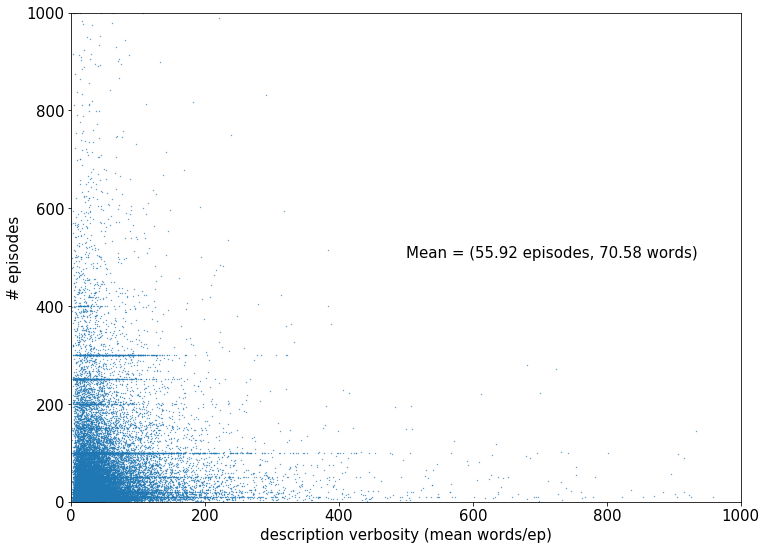

In [22]:
from matplotlib import pyplot as plt,rcParams
rcParams.update({'font.size': 15})


plotvar = np.array(verbosity_numepisodes)

plt.figure(figsize=[12,9])
plt.scatter(plotvar[:,0],plotvar[:,1],s=.1)
plt.xlabel('description verbosity (mean words/ep)')
plt.ylabel('# episodes')
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.text(500,500,'Mean = (%.2f episodes, %.2f words)' % (np.mean(plotvar[:,0]),np.mean(plotvar[:,1])))

In [6]:
#load in word2vec
import gensim
import numpy as np

floc = '/home/bmassi/Dropbox/professional/Insight/data/'
fname = 'GoogleNews-vectors-negative300.bin'

word2vec = gensim.models.KeyedVectors.load_word2vec_format(floc+fname, binary=True)
print('loaded!')

#takes list of words, safely computes average word2vec. 
def ep2vec(episode):
    n = 0
    a = np.array([300,])
    for w in episode:
        try:
            a += word2vec[w]
            n += 1
        except:
            pass
    try:
        avg = a/n
        return avg
    except:
        return None

loaded!


In [28]:
import numpy as np

#takes list of words, safely computes average word2vec. 
def ep2vec(episode):
    n = 0
    a = np.zeros([300,])
    for w in episode:
        try:
            a = np.add(a,word2vec[w])
            n += 1
        except Exception as e:
            pass
    try:
        avg = a/n
        return avg
    except:
        return None

e2v = []
for p in preprocessed_summaries:
    e2v.append((p[0],p[1],[ep2vec(e) for e in p[2]]))

/home/bmassi/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide


('https://www.okbeast.com/category/a-plus-anime-podcast/feed/podcast/',
 'Captain Planet and Power Rangers – A+ Anime Episode 39',
 [array([ 0.04276957,  0.04408539, -0.01206401,  0.09467794, -0.03770424,
          0.03359049,  0.06842936, -0.09002604,  0.08351685,  0.03231201,
         -0.03573812, -0.11002781, -0.02239421,  0.02870361, -0.08175644,
          0.06835368,  0.04932048,  0.09325968,  0.0471401 , -0.08725667,
          0.03476746,  0.05279317,  0.06404541,  0.02416341, -0.01255778,
          0.01146993, -0.06395304,  0.09621745,  0.01729574, -0.07781982,
         -0.02746257, -0.02651449, -0.0564741 ,  0.00536214,  0.01764242,
         -0.03536133,  0.06504435, -0.02523722,  0.03819987,  0.06425496,
          0.03877604, -0.06466268,  0.08613871,  0.08643555, -0.05935791,
         -0.08052846,  0.01531718, -0.0432666 ,  0.04289124, -0.00634949,
         -0.09107869, -0.03682048,  0.05066793,  0.03209554,  0.00199951,
         -0.0123292 , -0.01677531, -0.02208201,  0.0509

In [39]:
# #associate summaries w/ row in podcast_df
# #load in podcast_df
# import pickle
# import pandas as pd


# #load in itunes_request_db
# floc = '/home/bmassi/Dropbox/professional/Insight/data/'
# raw_itunes_requests = pickle.load(open(floc+'raw_itunes_requests1528609065.pkl','rb'))
# #turn everything into a pandas dataframe
# formatted_results = []
# bads = []
# cnames = ['']
# for rir in raw_itunes_requests:
#     for p in rir.json()['results']:
#         if(p['kind']=='podcast'):
#             formatted_results.append(p)

# podcast_df = pd.DataFrame(formatted_results)

In [52]:
# #here we add new columns
# print('associating summaries...')

# podcast_df['summaries'] = pd.Series(dtype='object')
# start_time = time.time()

# for i in range(0,len(english_podcasts)):
#     idx = podcast_df.loc[podcast_df['feedUrl']==english_podcasts[i][0]].index.values[0]
#     podcast_df.at[idx,'summaries'] = english_podcasts[i][1]
#     podcast_df.at[idx,'nepisodes'] = len(english_podcasts[i][1])
#     if((i % 1000)==0):
#         stop_time = time.time()
#         duration = stop_time - start_time
#         print('######'+str(i)+' / ' + str(len(summaries)) + ' (last 1k duration = ' + str(duration) + ')')
#         start_time = time.time()
# print("Done associating summaries with old podcast_df")

associating summaries...
######0 / 43797 (last 1k duration = 0.04360246658325195)
######1000 / 43797 (last 1k duration = 37.51425790786743)


KeyboardInterrupt: 

In [ ]:
#TF-IDF for most important words in summaries

In [ ]:
#Put summaries in word2vec vectors

In [10]:
import pickle

floc = '/home/bmassi/Dropbox/professional/Insight/data/preprocessed_summaries2/'
with open(floc+'feeds_0_1529184593.957413.pkl','rb') as fid:
    prog1 = pickle.load(fid)
    
with open(floc+'feeds_1_1529184593.957413.pkl','rb') as fid:
    prog2 = pickle.load(fid)

In [21]:
f1 = [f[0] for f in prog1]
f2 = [f[0] for f in prog2]

In [44]:
prog1[100][0]

'https://airbyte.fireside.fm/rss'

In [19]:
member

[True, False, False, False]